<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/05_warmup.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# WARMUP | Lesson 05

**Goal**: Plot a timeseries of the annual average number of magnitude 6 (or larger) earthquakes.

In this warmup, you will demonstrate your proficiency in using `pandas` and `matplotlib` for scientific data analysis in a Jupyter notebook.  I am intentionally not providing much guidance in this exercise, leaving it to you to determine the best path to the goal.  That said, I do have some specific instructions:

* download [this CSV](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/data/usgs_major_earthquakes_1900-2023.csv) file containing a dataset of all earthquakes greater than magnitude 6 that USGS has on record since 1900
* utilize Markdown cells extensively to document your thought process, including notes about the CSV file, its origin, etc.
* comment your code extensively
* use git to stage/commit/push this notebook to your course github repository once done (in a lesson 04 folder)
* bonus: if you still have time, also make a plot of # of earthquakes vs month (the seasonal cycle, if there is one)

A note about the CSV file: I obtained it from [a USGS query for magnitude 6 or larger earthquakes globally since 1900](https://earthquake.usgs.gov/earthquakes/map/?extent=-88.71618,-248.20313&extent=88.70033,336.79688&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-01-01%2000:00:00%22,%22endtime%22:%222023-09-22%2023:59:59%22,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) on Friday September 22, 2023 at 10:20am Eastern.  Though USGS ultimately was the source of the data, my search originated from an [NCEI website](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search).  (See the markdown source of this cell for the specific URLs; the USGS query URL contains the specific query parameters.)

I used the CSV download option provided on the website, and the file was downloaded as `query.csv`; I renamed the file to `usgs_major_earthquakes_1900-2023.csv`.

When I download data like this from a web source, I'll often put it in a `data` folder somewhere and will place a `README` (or `README.md`) file in the `data` directory to give information about where I downloaded the data from and any citations that the data provider requests that I use.  I do this because I often come back to datasets like this later on and it isn't always straightforward to find this information after the fact.

# Solution

*start you markdown comments here*

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load the csv file
earthquake_file = "usgs_major_earthquakes_1900-2023.csv"
# always try to convert the datetime column while reading
earthquake_df = pd.read_csv(earthquake_file, parse_dates=[0])
earthquake_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-21 21:11:49.950000+00:00,-14.0039,167.1898,188.419,6.1,mww,76.0,26.0,7.076,0.83,...,2023-09-21T23:17:30.631Z,"41 km WSW of Sola, Vanuatu",earthquake,8.86,4.898,0.054,33.0,reviewed,us,us
1,2023-09-20 14:45:58.609000+00:00,-4.5826,-105.6493,10.000,6.0,mww,110.0,208.0,15.828,1.08,...,2023-09-21T21:02:41.950Z,central East Pacific Rise,earthquake,14.99,1.952,0.050,38.0,reviewed,us,us
2,2023-09-18 13:21:23.790000+00:00,26.4336,125.3032,183.483,6.3,mww,113.0,35.0,2.262,1.21,...,2023-09-19T13:29:35.504Z,"180 km N of Hirara, Japan",earthquake,6.53,4.942,0.044,49.0,reviewed,us,us
3,2023-09-13 11:49:15.926000+00:00,-36.2201,-97.9378,10.000,6.1,mww,117.0,37.0,13.309,0.65,...,2023-09-14T11:52:11.466Z,West Chile Rise,earthquake,10.28,1.860,0.050,39.0,reviewed,us,us
4,2023-09-12 11:03:18.873000+00:00,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,2023-09-18T13:59:24.715Z,"73 km N of Namuac, Philippines",earthquake,8.03,5.112,0.046,46.0,reviewed,us,us


In [3]:
# overview of the columns
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13927 entries, 0 to 13926
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             13927 non-null  datetime64[ns, UTC]
 1   latitude         13927 non-null  float64            
 2   longitude        13927 non-null  float64            
 3   depth            13873 non-null  float64            
 4   mag              13927 non-null  float64            
 5   magType          13927 non-null  object             
 6   nst              2371 non-null   float64            
 7   gap              3166 non-null   float64            
 8   dmin             1416 non-null   float64            
 9   rms              6283 non-null   float64            
 10  net              13927 non-null  object             
 11  id               13927 non-null  object             
 12  updated          13927 non-null  object             
 13  place           

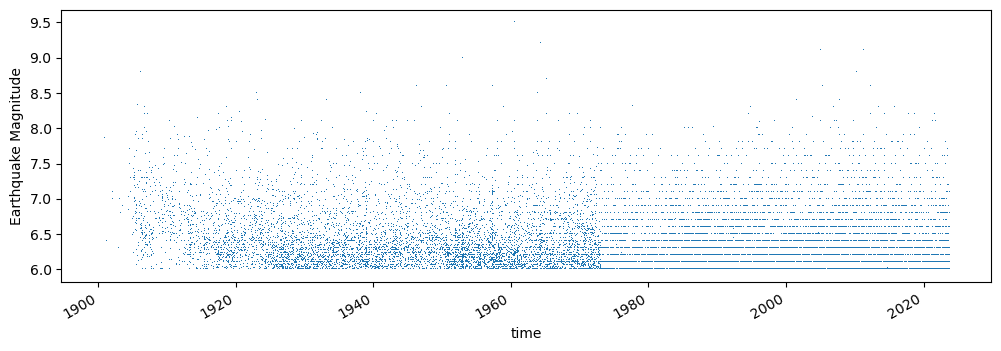

In [4]:
# plot all the data by mag vs time
fig, ax = plt.subplots(figsize = (12,4))

# draw the scatter on the plot by setting no linestyle
earthquake_df.plot(x='time', y='mag', ax=ax, marker=',', linestyle='none', legend=False)

# set the axis lable
ax.set_ylabel("Earthquake Magnitude")

# show the plot
plt.show()

In [5]:
# calculate the number of earthquakes in each year
earthquake_num_df = earthquake_df['mag'].groupby(earthquake_df['time'].dt.year).count()
earthquake_num_df

time
1900      1
1901      3
1902      2
1903      3
1904      9
       ... 
2019    145
2020    121
2021    157
2022    127
2023    103
Name: mag, Length: 124, dtype: int64

In [6]:
# the result is Series rather than DataFrame
earthquake_num_df.info()

<class 'pandas.core.series.Series'>
Index: 124 entries, 1900 to 2023
Series name: mag
Non-Null Count  Dtype
--------------  -----
124 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


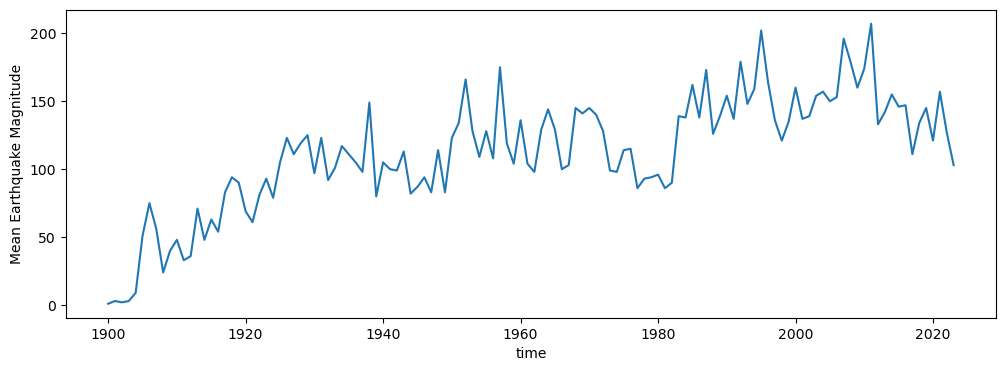

In [7]:
""" Alternative way to plot the result 
Credit: 05_warmup.ipynb from G690 class"""
# the Series can be plot directly with the index being x axis
# create the figure and axis
fig, ax = plt.subplots(figsize = (12,4))

# plot magnitude
earthquake_num_df.plot(ax=ax)

# label axes
ax.set_ylabel("Mean Earthquake Magnitude")

# show the plot
plt.show()

In [8]:
# add the year column by reseting the index axis
earthquake_num_df = earthquake_num_df.rename_axis('year').reset_index()

# rename the magnitude column to number(count)
earthquake_num_df.rename(columns={'mag': 'num'}, inplace=True)
earthquake_num_df

,year,num
0,1900,1
1,1901,3
2,1902,2
3,1903,3
4,1904,9
...,...,...
119,2019,145
120,2020,121
121,2021,157
122,2022,127


In [9]:
# now it is converted to a Dataframe
earthquake_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    124 non-null    int32
 1   num     124 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 1.6 KB


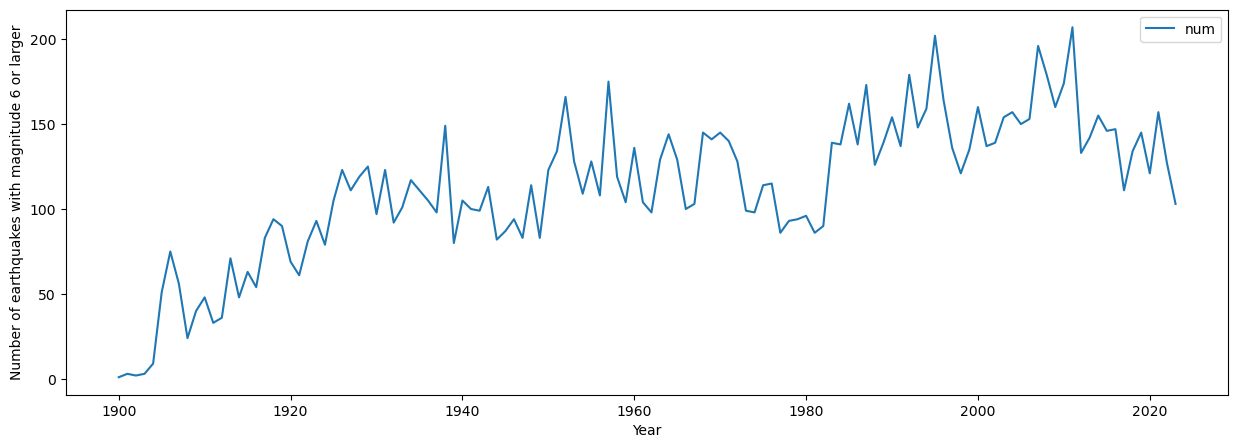

In [10]:
# plot the timeseries
fig, ax = plt.subplots(figsize=(15,5))
earthquake_num_df.plot(x='year', y='num', ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Number of earthquakes with magnitude 6 or larger")
plt.show()

In [11]:
""" Get the seasonal cycle of earthquakes count """
# extract the dataset after year 1980
earthquake_recent_df = earthquake_df[earthquake_df['time'].dt.year >= 1980]

# calculate the number of earthquakes for each month
earthquake_month_df = earthquake_recent_df.groupby(earthquake_recent_df['time'].dt.month)['mag'].count()
earthquake_month_df

time
1     503
2     485
3     574
4     595
5     557
6     492
7     488
8     531
9     550
10    547
11    565
12    522
Name: mag, dtype: int64

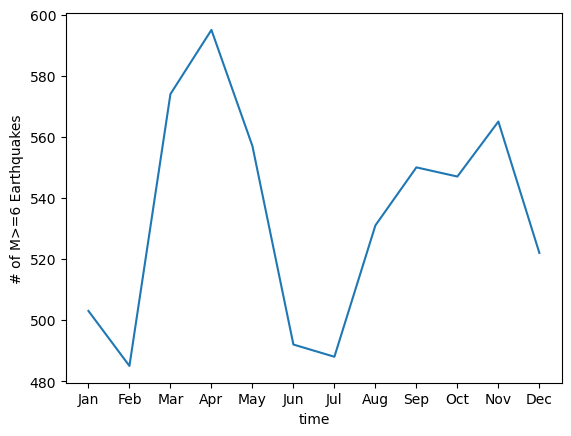

In [12]:
# plot the monthly result
fig, ax =  plt.subplots()

# plot the count
earthquake_month_df.plot(ax=ax)

# label the x-axis as month names
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

ax.set_ylabel("# of M>=6 Earthquakes")

plt.show()